[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/diogoflim/ProjIntegrador_PO_IA/blob/main/mcda.ipynb)


## Conjunto de dados


Trabalharemos com um conjunto de dados do Legathum Prosperity Index que avalia países com base em 12 indicadores socioeconômicos. Os dados estão armazenados em uma planilha Excel. Para realizar a leitura, utilizaremos a biblioteca Pandas.

In [17]:
import pandas as pd
import numpy as np

In [18]:
# Leitura dos dados
url = 'https://raw.githubusercontent.com/diogoflim/ProjIntegrador_PO_IA/main/Dados/LegathumProsperityIndex.csv'
df = pd.read_csv(url, index_col=0, sep = ';')


In [19]:
df

,Economic Quality,Education,Enterprise Conditions,Governance,Health,Infrastructure and Market Access,Investment Environment,Living Conditions,Natural Environment,Personal Freedom,Safety and Security,Social Capital
Alternativa,,,,,,,,,,,,
Afghanistan,33.79,27.58,42.91,31.18,50.98,25.37,30.07,38.92,40.48,41.21,19.71,22.32
Albania,41.81,70.91,56.71,47.94,73.84,60.95,52.37,73.94,58.27,59.78,73.09,44.92
Algeria,37.83,61.87,44.44,39.64,72.47,48.77,37.95,76.62,44.89,39.56,75.23,47.04
Angola,31.44,27.70,33.34,33.81,50.29,31.62,22.79,42.35,50.50,40.18,61.39,44.11
Argentina,36.14,71.40,46.95,55.93,77.19,54.35,53.46,80.64,58.57,77.57,70.43,51.26
...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,27.48,61.67,19.88,12.41,70.48,38.96,27.89,68.82,57.61,40.63,41.40,44.20
Vietnam,58.06,66.64,54.55,44.33,76.48,62.96,44.92,71.84,52.71,40.10,67.71,63.94
Yemen,26.05,28.72,34.39,17.41,57.02,28.35,27.49,44.57,45.34,22.95,26.48,41.20


In [20]:
X = np.array(df)

X

array([[33.79, 27.58, 42.91, ..., 41.21, 19.71, 22.32],
       [41.81, 70.91, 56.71, ..., 59.78, 73.09, 44.92],
       [37.83, 61.87, 44.44, ..., 39.56, 75.23, 47.04],
       ...,
       [26.05, 28.72, 34.39, ..., 22.95, 26.48, 41.2 ],
       [29.4 , 40.7 , 51.58, ..., 48.79, 66.36, 51.73],
       [35.83, 52.28, 36.63, ..., 39.35, 61.41, 45.62]])

In [21]:
m, n = X.shape

print(f'O número de alternativas é: {m}\nO número de critérios é: {n}')

O número de alternativas é: 167
O número de critérios é: 12


# Decisão Multicritério

A literatura de decisão multicritério apresenta uma vasta quantidade de métodos para a resolução de problemas de decisão que envolvem múltiplos objetivos, muitas vezes conflitantes.

A Biblioteca PyDecision (https://github.com/Valdecy/pyDecision) inclui diversos métodos em Python. 

In [147]:
# No Google Colab
!pip install pyDecision


^C


In [22]:
from pyDecision.algorithm import promethee_i, promethee_ii

## PROMETHEE II

Inicialmente, aplicaremos os métodos PROMETHEE I e PROMETHEE II são usados para ordenar alternativas em problemas de análise multicritério.

Como visto na aula, os parâmetros do PROMETHEE II incluem:

- O tipo de função de preferências de cada critério;
- Limiares de indiferença, preferência e veto para cada critério;
- Pesos dos critérios;
- Parâmetro $s$, caso a função de preferência s-curve seja escolhida para algum critério.

In [23]:
# Parâmetros
Q = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5] # Limiares de indiferença
P = [20 for j in range(n)] # Limiares de preferência
W = [1/n for j in range(n)] # pesos
S = [0 for j in range(n)] # s (caso use o critério Gaussiano)
F = ['t5' for j in range(n)] # 't1' = Usual; 't2' = U-Shape; 't3' = V-Shape; 't4' = Level; 't5' = V-Shape with Indifference; 't6' = Gaussian; 't7' = C-Form


In [24]:
P

[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]

Vamos aplicar o PROMETHEE e armazenar os fluxos líquidos em p2.

Imprimiremos na tela os resultados das 20 primeiras alternativas 

ValueError: 0 is not in list

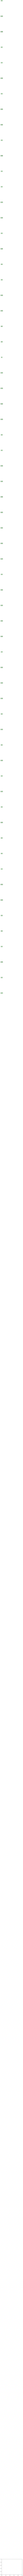

In [29]:
p1 = promethee_i(X, W = W, Q = Q, S = S, P = P, F = F, graph = True)

In [27]:
for i in range(p1.shape[0]):
  print('a'+str(i+1), p1[i])

a1 ['-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-'
 '-' '-' '-' '-' '-' '-' '-' '-' 'R' '-' '-' '-' '-' '-' '-' '-' '-' '-'
 '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-'
 '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-'
 '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-'
 '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-'
 '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-'
 '-' '-' '-' '-' '-' '-' '-' 'R' '-' '-' 'P+' '-' '-' '-' '-' '-' '-' '-'
 '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-'
 '-' '-' 'P+' '-' '-']
a2 ['P+' '-' 'P+' 'P+' '-' '-' '-' '-' 'P+' '-' 'P+' '-' '-' 'P+' 'P+' 'P+'
 'P+' 'P+' 'R' '-' 'P+' 'P+' 'P+' 'P+' 'P+' '-' 'P+' 'P+' '-' '-' 'R' 'P+'
 'P+' '-' '-' 'P+' '-' '-' 'P+' 'P+' '-' 'P+' 'P+' 'P+' 'P+' 'P+' 'P+'
 'P+' '-' 'P+' 'P+' '-' '-' 'P+' '-' '-' 'P+' '-' 'P+' 'P+' 'P+' 'P+' 'P+'
 'P+' '-' '-' '-' '

In [28]:
p2 = promethee_ii(X, W = W, Q = Q, S = S, P = P, F = F, sort = False, topn = 20)

a1: -0.689
a2: 0.05
a3: -0.189
a4: -0.565
a5: 0.097
a6: 0.134
a7: 0.652
a8: 0.68
a9: -0.034
a10: 0.132
a11: -0.345
a12: 0.078
a13: 0.562
a14: -0.096
a15: -0.296
a16: -0.189
a17: 0.003
a18: -0.035
a19: 0.063
a20: 0.251


Podemos acessar os fluxos líquidos das alternativas e incluí-los em um DataFrame!

In [10]:
resultados = pd.DataFrame(p2[:,1], columns = ['Fluxo Líquido'], index = df.index)
resultados


,Fluxo Líquido
Alternativa,
Afghanistan,-0.689253
Albania,0.049521
Algeria,-0.189376
Angola,-0.564746
Argentina,0.097370
...,...
Venezuela,-0.441557
Vietnam,0.035138
Yemen,-0.699471


Ordenando o DataFrame em ordem decrescente de fluxos!

In [11]:
ordem = resultados.sort_values(by = 'Fluxo Líquido', ascending=False, inplace=False)
ordem

,Fluxo Líquido
Alternativa,
Denmark,0.752251
Norway,0.749159
Sweden,0.747540
Finland,0.742711
Switzerland,0.734687
...,...
Chad,-0.680064
Afghanistan,-0.689253
Central African Republic,-0.690715


Vejamos as 10 melhores alternativas!

In [12]:
ordem.iloc[:10]

,Fluxo Líquido
Alternativa,
Denmark,0.752251
Norway,0.749159
Sweden,0.747540
Finland,0.742711
Switzerland,0.734687
New Zealand,0.705904
Netherlands,0.704447
Luxembourg,0.689786
Iceland,0.685081


Quais são as 10 piores?

In [13]:
ordem.iloc[-10:]

,Fluxo Líquido
Alternativa,
Syria,-0.597792
Sudan,-0.624396
Democratic Republic of Congo,-0.656097
Somalia,-0.661713
Eritrea,-0.663268
Chad,-0.680064
Afghanistan,-0.689253
Central African Republic,-0.690715
Yemen,-0.699471


Vamos armazenar os resultados em um csv!

In [14]:
ordem.to_excel('meus_resultados_promethee.xlsx')